# Importing libraries

All of the necessary libraries are imported to perform various functions upon the dataset

In [53]:
# linear algebra
import numpy as np 

#Import os
import os

# data processing
import pandas as pd

In [54]:
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [55]:
# Machine learning algorithms
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Library to split the dataset
from sklearn.model_selection import train_test_split

In [57]:
# Storing the titanic datset within a dataframe
filename = 'titanic.csv'
# filename = 'kaggle_train.csv'
# filename = 'kaggle_test.csv'

complete_df = pd.read_csv(os.path.join('..','..','data',filename))

# Data Analysis

Here the dataset is analysed to see what exactly it is made up of.

In [58]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Pclass    1309 non-null   float64
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   float64
 6   Parch     1309 non-null   float64
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(6), object(5)
memory usage: 112.6+ KB


In [59]:
complete_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.381971,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.486055,0.837836,14.413500,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [60]:
complete_df.head(8)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3.0,"Boulos, Mr. Hanna",male,NaN,0.0,0.0,2664,7.2250,NaN,C
1,1.0,3.0,"de Mulder, Mr. Theodore",male,30.0,0.0,0.0,345774,9.5000,NaN,S
2,0.0,2.0,"Banfield, Mr. Frederick James",male,28.0,0.0,0.0,C.A./SOTON 34068,10.5000,NaN,S
3,0.0,2.0,"Eitemiller, Mr. George Floyd",male,23.0,0.0,0.0,29751,13.0000,NaN,S
4,1.0,1.0,"Longley, Miss. Gretchen Fiske",female,21.0,0.0,0.0,13502,77.9583,D9,S
5,0.0,3.0,"Augustsson, Mr. Albert",male,23.0,0.0,0.0,347468,7.8542,NaN,S
6,0.0,1.0,"Rothschild, Mr. Martin",male,55.0,1.0,0.0,PC 17603,59.4000,NaN,C
7,0.0,3.0,"Reynolds, Mr. Harold J",male,21.0,0.0,0.0,342684,8.0500,NaN,S


Below is a graph depcting the survival rate of people according to their gender and their passenger class. It clearly indicates that females and people from higher classes were most likely to survive

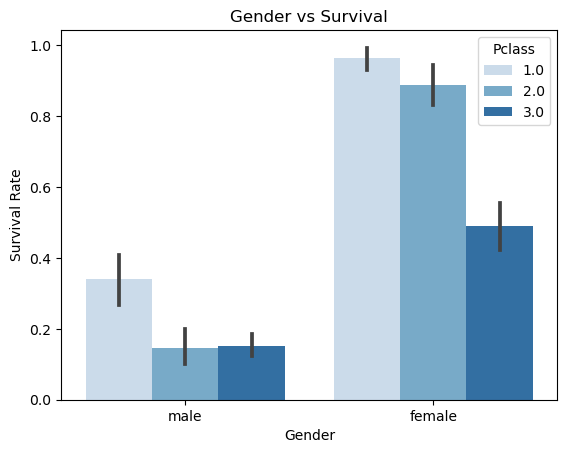

In [61]:

try:
    #Creating the bar plot grouped across classes
    sns.barplot(x = 'Sex',y = 'Survived',hue = 'Pclass',data = complete_df, palette = "Blues")
    #Adding the aesthetics
    plt.title('Gender vs Survival')
    plt.xlabel('Gender')
    plt.ylabel('Survival Rate') 
    # Show the plot
    plt.show()
except:
    print('Skipping')

# Managing the missing data

Showing the missing data within the data set

In [62]:
total = complete_df.isnull().sum().sort_values(ascending=False)
percent_1 = complete_df.isnull().sum()/complete_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,1014,77.5
Age,263,20.1
Embarked,2,0.2
Fare,1,0.1
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


##### Removing unnecessary variables to simplify the data being used to generate the predictive model

In [63]:
# Removing the cabin feature as it contains too many missing variables
complete_df = complete_df.drop(['Cabin'], axis=1)
complete_df = complete_df.drop(['Ticket'], axis=1)

######  Imputing the missing value in column with the average

In [64]:
complete_df['Fare'].fillna(value=complete_df['Fare'].mean(), inplace=True)

In [65]:
complete_df = complete_df.dropna(subset=['Fare'])
complete_df[complete_df['Fare'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


###### Filling in the missing values for the embarked feature

In [66]:
complete_df['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [67]:
complete_df['Embarked'].fillna("S", inplace = True)

In [68]:
complete_df['Embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: Embarked, dtype: object

# Creating and altering features

###### Adding a feature to represent the title that each passenger possessed to help further differentiate passengers even within their passenger classes

In [69]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [complete_df]

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Sir', 'Countess','Capt', 'Dr','Dona', 'Col',\
                                            'Major', 'Rev', 'Lady', 'Jonkheer', 'Don'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
complete_df = complete_df.drop(['Name'], axis=1)

Below is a graph depcting the title vs survival rate of the people with the different hues of red depicting the different passenger classes within each category

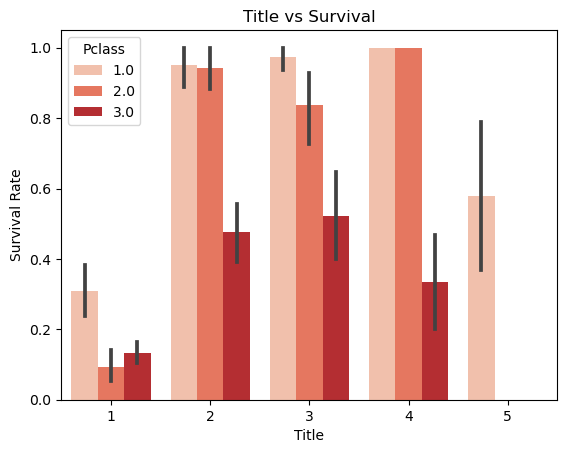

In [70]:
try:
    #Creating the bar plot grouped across classes
    sns.barplot(x = 'Title',y = 'Survived',hue = 'Pclass',data = complete_df, palette = "Reds")
    #Adding the aesthetics
    plt.title('Title vs Survival')
    plt.xlabel('Title')
    plt.ylabel('Survival Rate') 
    # Show the plot
    plt.show()

except:
    print('Skipping')

###### Filling in the missing age values by using the mean values for other people who have a similar passenger class, sex and title as them

In [71]:
complete_df['Age'].fillna(complete_df.groupby(['Pclass','Sex','Title'])['Age'].transform('mean'), inplace=True)

Graph representing the amount of people who survived from each age bracket when compared to those who did not survive

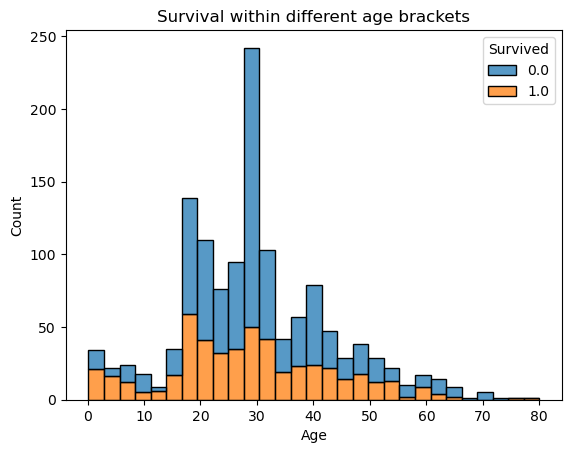

In [72]:
try:

    sns.histplot(data=complete_df, stat="count", multiple="stack",
                 x="Age", kde=False,
                 hue="Survived",
                 element="bars", legend=True)
    plt.title("Survival within different age brackets")
    plt.xlabel("Age")
    plt.ylabel("Count")

    plt.show()
except:
    print('Skipping')

Converting the categorical features into numerical ones so that they may be accepted as input into the machine learning algorithms

In [73]:
genders = {"male": 0, "female": 1}

data = [complete_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

###### Changing float features to int

In [74]:
data = [complete_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Pclass'] = dataset['Pclass'].astype(int)
    dataset['Sex'] = dataset['Sex'].astype(int)
    dataset['Title'] = dataset['Title'].astype(int)
    dataset['SibSp'] = dataset['SibSp'].astype(int)
    dataset['Parch'] = dataset['Parch'].astype(int)
    

###### Performing One-hot encoding on class and embarked variables

In [75]:
#First perform the one hot encoding and then remove a single column
complete_df = pd.get_dummies(complete_df, columns = ['Pclass', 'Embarked','Title'])

###### Dropping additional columns

In [76]:
complete_df = complete_df.drop(['Pclass_3'], axis=1)
complete_df = complete_df.drop(['Embarked_S'], axis=1)

In [77]:
complete_df.head(8)

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Title_1,Title_2,Title_3,Title_4,Title_5
0,0.0,0,28.31891,0,0,7,0,0,1,0,1,0,0,0,0
1,1.0,0,30.00000,0,0,9,0,0,0,0,1,0,0,0,0
2,0.0,0,28.00000,0,0,10,0,1,0,0,1,0,0,0,0
3,0.0,0,23.00000,0,0,13,0,1,0,0,1,0,0,0,0
4,1.0,1,21.00000,0,0,77,1,0,0,0,0,1,0,0,0
5,0.0,0,23.00000,0,0,7,0,0,0,0,1,0,0,0,0
6,0.0,0,55.00000,1,0,59,1,0,1,0,1,0,0,0,0
7,0.0,0,21.00000,0,0,8,0,0,0,0,1,0,0,0,0


###### Saving the data

In [78]:
complete_df.to_csv(os.path.join('..','..',"data",'Variant 2',"titanic_cleaned.csv"),index=False)
# complete_df.to_csv(os.path.join('..','..',"data",'Variant 2',"kaggle_train_cleaned.csv"),index=False)
# complete_df.to_csv(os.path.join('..','..',"data",'Variant 2',"kaggle_test_cleaned.csv"),index=False)